In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqrf

In [407]:
df = pd.read_csv(r"C:\Users\Luchiana\OneDrive - ONE NEW EXPERIENCE\Desktop\Others-private\Python-Projects\Crime_Dataset_Cleaned.csv")
df.head()

,ID,Reported Date,Occured Date,Occured Time,Area Name,Crime Code,Crime Code Desc,Victim Age,Victim Sex,Race,Crime Loc Code,Crime Loc Code Desc,Weapon Code,Weapon Desc,Status,Status Desc,Location,Latitude,Longitude
0,10304468,2020-01-08,2020-01-08,22:30,Southwest,624,Battery - Simple Assault,36,Female,Black,501,Single Family Dwelling,400,"Strong-Arm (Hands, Fist, Feet Or Bodily Force)",AO,Adult Other,1100 W 39Th Pl,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,03:30,Central,624,Battery - Simple Assault,25,Male,Hispanic,102,Sidewalk,500,Unknown Weapon/Other Weapon,IC,Invest Cont,700 S Hill St,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,12:00,Central,845,Sex Offender Registrant Out Of Compliance,0,Unknown,Unknown,726,Police Facility,0,Weapon Desc,AA,Adult Arrest,200 E 6Th St,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,17:30,N Hollywood,745,Vandalism - Misdeameanor ($399 Or Under),76,Female,Unknown,502,"Multi-Unit Dwelling (Apartment, Duplex, Etc)",0,Weapon Desc,IC,Invest Cont,5400 Corteen Pl,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,04:15,Mission,740,"Vandalism - Felony ($400 & Over, All Church Va...",31,Unknown,Unknown,409,Beauty Supply Store,0,Weapon Desc,IC,Invest Cont,14400 Titus St,34.2198,-118.4468


# What racial groups are most impacted?

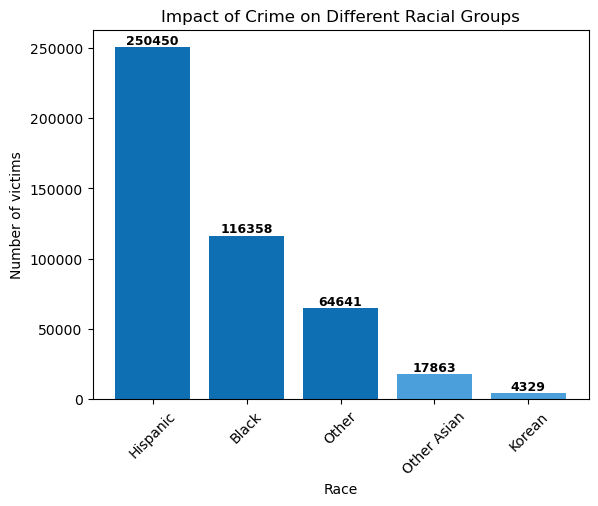

The race most impacted by the number of crimes is Hispanic followed by Black. Unfortunately, a number of 64641 victims are from other race.


In [408]:
#Most affected race by number of crimes from 2020 till 9th October 2023

df_victim_by_race = df.groupby('Race')['ID'].count().reset_index()
df_victim_by_race.columns=['Race','Total_victims']
df_victim_by_race = df_victim_by_race.sort_values(by='Total_victims', ascending=False).iloc[1:6]

max_crimes_no = df_victim_by_race['Total_victims'].idxmax()
second_max_crimes_no = df_victim_by_race.sort_values(by='Total_victims',ascending=False).iloc[1].name
third_crimes_no = df_victim_by_race.sort_values(by='Total_victims', ascending = False).iloc[2].name


vals = pd.Series(df_victim_by_race['Total_victims'].values)
df_victim_by_race['color'] = df_victim_by_race['Total_victims'].apply(lambda x:'#4B9FDA' if x < 50000 else '#0E6FB2')

plt.bar(df_victim_by_race['Race'], df_victim_by_race['Total_victims'], color=df_victim_by_race['color'])
plt.xlabel('Race')
plt.ylabel('Number of victims')
plt.title('Impact of Crime on Different Racial Groups')
plt.xticks(rotation=45)

for index,value in enumerate(vals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9, fontweight='semibold', color='#000')

plt.show()
    
message = 'The race most impacted by the number of crimes is \033[1m{}\033[0m followed by \033[1m{}\033[0m' \
          '. Unfortunately, a number of \033[1m{}\033[0m victims are from other race.'.format(
              df_victim_by_race['Race'].loc[max_crimes_no],
              df_victim_by_race['Race'].loc[second_max_crimes_no],
              df_victim_by_race['Total_victims'].loc[third_crimes_no])
print(message)


# Which weapons are most commonly associated with reported cases?

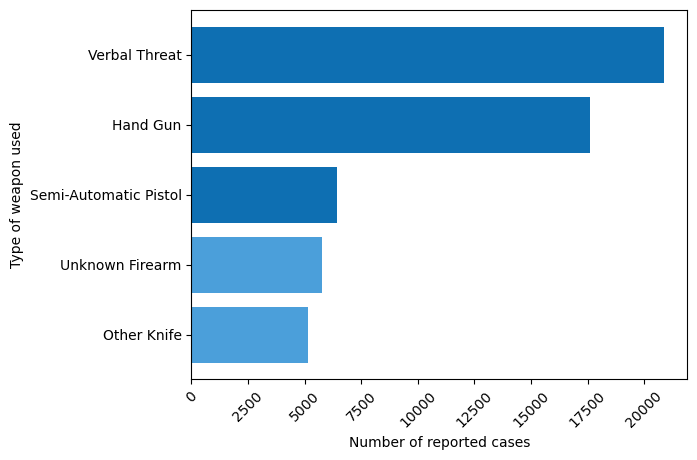

In [409]:
df_most_used_weapons = df.groupby(['Weapon Code','Weapon Desc'])['ID'].count().reset_index()
df_most_used_weapons.columns=['Weapon Code', 'Weapon', 'Number of crimes']
df_most_used_weapons = df_most_used_weapons[~df_most_used_weapons['Weapon Code'].astype(str).str.endswith('0')]
df_most_used_weapons = df_most_used_weapons.sort_values(by='Number of crimes', ascending =False).head(5)
df_top5_most_used_weapons = df_most_used_weapons.sort_values(by='Number of crimes', ascending= True)

df_top5_most_used_weapons['color'] =df_top5_most_used_weapons['Number of crimes'].apply(lambda x:'#4B9FDA' if x < 6000 else '#0E6FB2')

plt.barh(df_top5_most_used_weapons['Weapon'], df_top5_most_used_weapons['Number of crimes'], color = df_top5_most_used_weapons['color'])
plt.xlabel('Number of reported cases')
plt.ylabel('Type of weapon used')

plt.xticks(rotation=45)
plt.show()

# What types of incidents are reported most frequently?

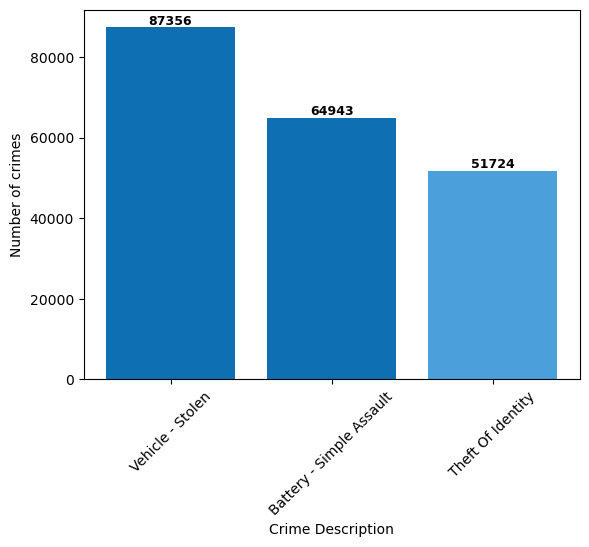

In [410]:
#most common type of crime
df.columns.tolist()

df_crimes = df.groupby(['Crime Code','Crime Code Desc'])['ID'].count().reset_index()
df_crimes.columns = ['Crime Code','Crime Description', 'Total Crimes']
df_crimes_top_3 = df_crimes.sort_values(by='Total Crimes', ascending=False).head(3)

vals = pd.Series(df_crimes_top_3['Total Crimes'].values)
df_crimes_top_3['color']=df_crimes_top_3['Total Crimes'].apply(lambda x:'#4B9FDA' if x<55000 else '#0E6FB2')

plt.bar(df_crimes_top_3['Crime Description'], df_crimes_top_3['Total Crimes'], color=df_crimes_top_3['color'])
plt.xlabel('Crime Description')
plt.ylabel('Number of crimes')
plt.xticks(rotation = 45)

for index,value in enumerate(vals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9, fontweight='semibold', color='#000')


plt.show()

# Which genre experiences the highest incidence of cases?

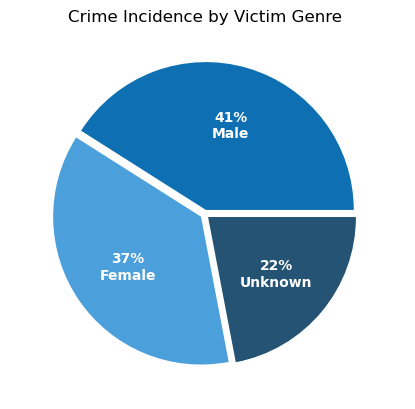

In [411]:
total_crimes=df['ID'].count()

df_crimes_by_genre = df.groupby('Victim Sex')['ID'].count().reset_index()
df_crimes_by_genre.columns= ['Genre', 'Number of crimes']
df_crimes_by_genre = df_crimes_by_genre.sort_values(by='Number of crimes', ascending=False)

male_percentage = ((df_crimes_by_genre[df_crimes_by_genre['Genre']=='Male']['Number of crimes']
                    / total_crimes) * 100).round(0).astype(float)
female_percentage = ((df_crimes_by_genre[df_crimes_by_genre['Genre'] == 'Female']['Number of crimes'] 
                      / total_crimes ) * 100).round(0).astype(float)
unknown_percentage = ((df_crimes_by_genre[df_crimes_by_genre['Genre']=='Unknown']['Number of crimes']
                       / total_crimes) * 100).round(0).astype(float)

colors = ['#0E6FB2', '#4B9FDA','#245373']
slices = np.array([male_percentage.values[0],female_percentage.values[0], unknown_percentage.values[0]])
genres=['Male', 'Female', 'Unknown']
explode = (0.03,0.03,0.03)
slices, colors, autotexts= plt.pie(slices, labels=genres,autopct='%1.0f%%',colors=colors ,explode=explode, pctdistance=0.6, textprops={'color':'white','weight':'bold', 'fontsize':10})

for i, label in enumerate(genres):
    autotexts[i].set_text(f'{autotexts[i].get_text()}\n{label}')

plt.title("Crime Incidence by Victim Genre")
plt.show()



# What age range is disproportionately affected?

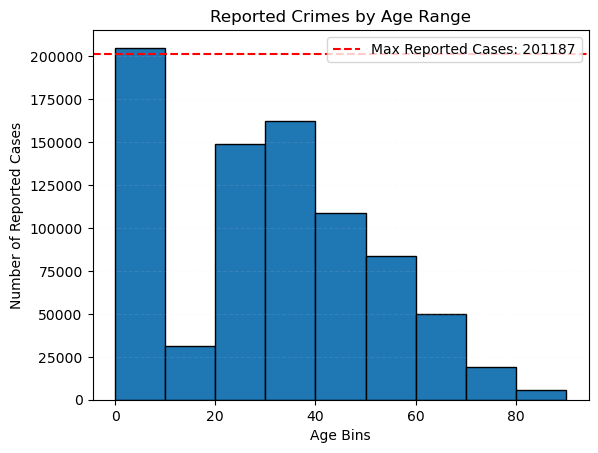

In [412]:
df['Victim Age'] = df['Victim Age'].replace([-3,-2,-1], 0)
df['Victim Age'] = df['Victim Age'].astype('int')

df2 = df.groupby('Victim Age')['ID'].count().reset_index()
ages = df2['Victim Age']
cases_reported = df2['ID']

plt.hist(ages, bins=np.arange(0,100,10), weights=cases_reported, edgecolor='black')
plt.xlabel('Age Bins')
plt.ylabel('Number of Reported Cases')
plt.title('Reported Crimes by Age Range')
plt.grid(axis='y', linestyle='--',alpha=0.1, color='#E9E9E9')

#Add horizontal line for the maximum value
max_crimes = max(cases_reported)
plt.axhline(y=max_crimes, color='red', linestyle='--', label= f'Max Reported Cases: {max_crimes}')
plt.legend()

plt.show()


# When do incidents most commonly occur?

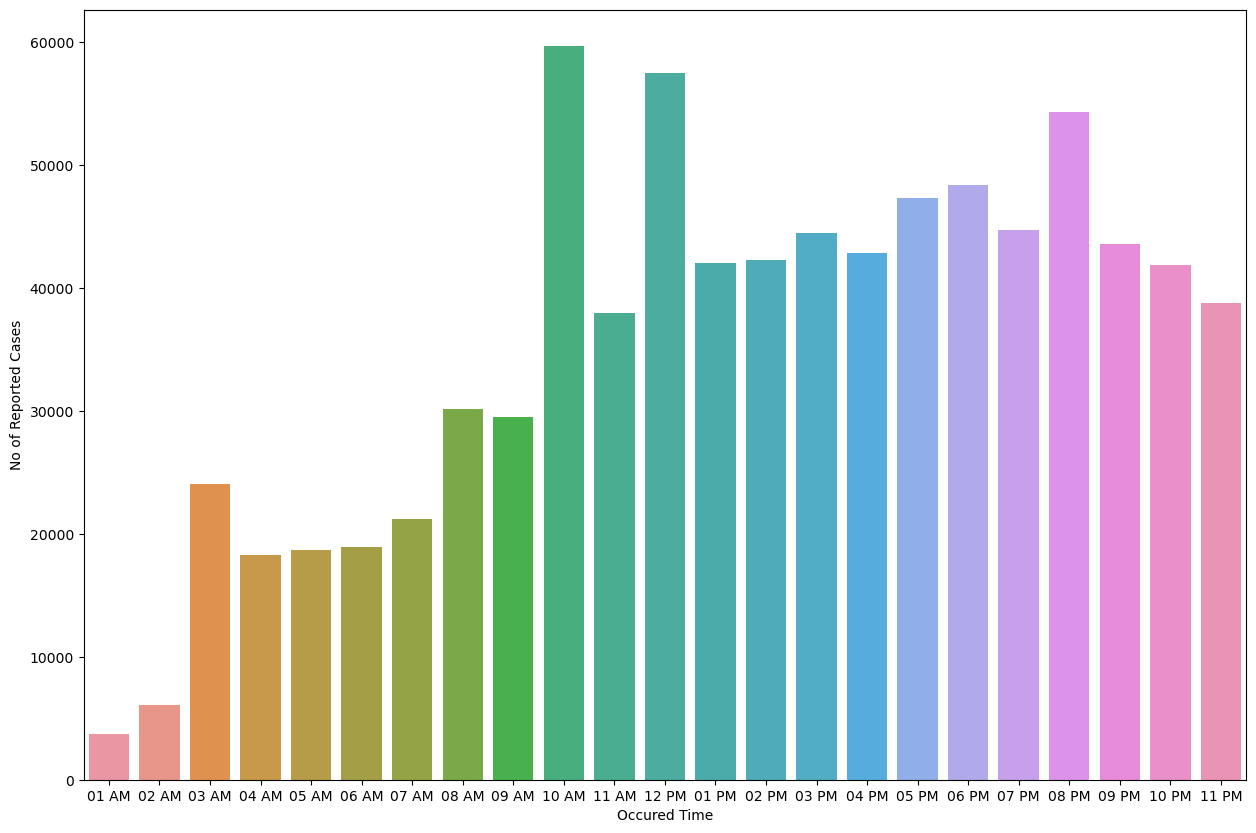

In [413]:
#number of reported cases by reported hour

df['Occured Time'] = pd.to_datetime(df['Occured Time'], errors='coerce').dt.strftime('%I %p')
df['Sort Time'] = pd.to_datetime(df['Occured Time'], format='%I %p')

df_cases_reported_by_hour = df.groupby(['Occured Time','Sort Time'])['ID'].count().reset_index()
df_cases_reported_by_hour.columns=['Occured Time', 'Sort time','No of Reported Cases']

df_sorted = df_cases_reported_by_hour.sort_values(by='Sort time').reset_index(drop=True)

df_sorted = df_sorted.drop('Sort time', axis=1)
plt.figure(figsize=(15,10))
sns.barplot(data =df_sorted ,x='Occured Time',y='No of Reported Cases')
plt.show()

# What are the statuses of the reported cases?

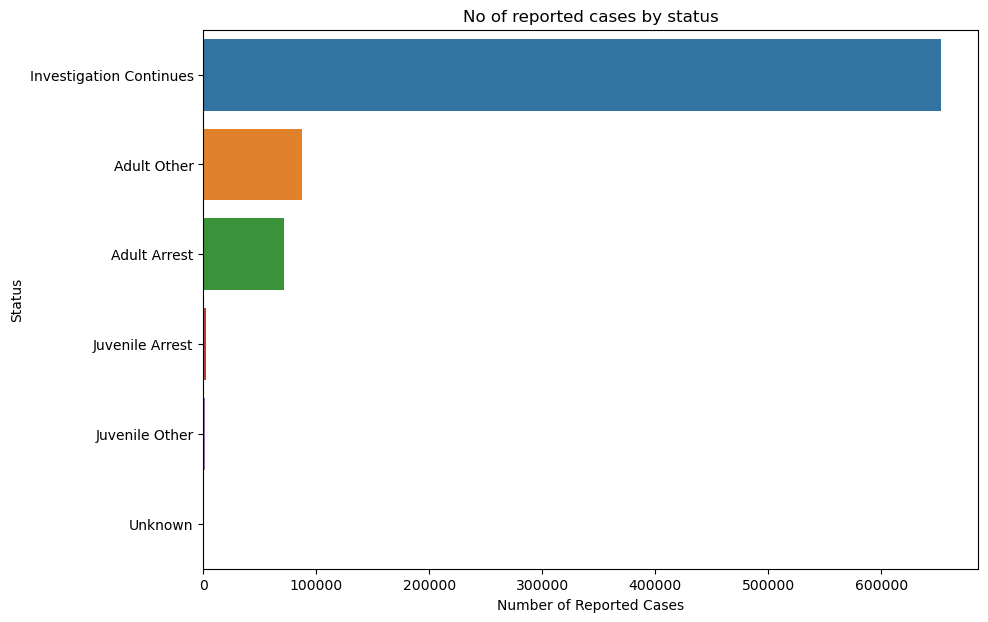

In [414]:
#df_cases_by_status = df.groupby(['Status', 'Status Desc'])['ID'].count().reset_index()
#df_cases_by_status[df_cases_by_status['Status Desc']=='UNK'].replace('UNK','Unknown')

def replace_values(x):
    if x=='UNK':
        return 'Unknown'
    elif x=='Invest Cont':
        return 'Investigation Continues'
    elif x.startswith('Juv'):
        return 'Juvenile ' + x.split()[1]
    else:
        return x

df_cases_by_status['Status Desc'] = df_cases_by_status['Status Desc'].apply(replace_values)

df_cases_by_status.columns=['Status code','Status Desc', 'Reported Cases']
df_cases_by_status = df_cases_by_status.sort_values(by='Reported Cases', ascending = False)

plt.figure(figsize=(10,7))
sns.barplot(data=df_cases_by_status, x='Reported Cases', y='Status Desc',orient ='h')
plt.xlabel('Number of Reported Cases')
plt.ylabel('Status')
plt.title('No of reported cases by status')

plt.show()

# Which areas are considered the least safe?

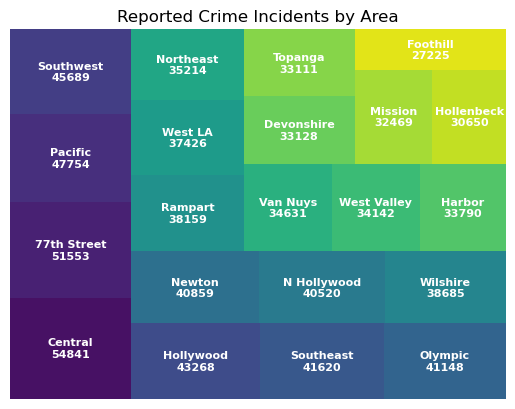

In [415]:
df_cases_by_area = df.groupby('Area Name')['ID'].count().reset_index()
df_cases_by_area.columns=['Area', 'Reported Cases']
df_cases_by_area = df_cases_by_area.sort_values(by='Reported Cases', ascending= False)

labels = [f'{area}\n{reported_cases}' for area, reported_cases in zip(df_cases_by_area.Area, df_cases_by_area['Reported Cases'])]

sqrf.plot(sizes=df_cases_by_area['Reported Cases'], label=labels ,text_kwargs={'color': 'white','fontweight': 'bold', 'fontsize':8},color=sns.color_palette('viridis', n_colors=len(df_cases_by_area['Area'])))

plt.axis('off')
plt.title('Reported Crime Incidents by Area')
plt.show()

# On which weekday do we observe the highest number of reported cases?

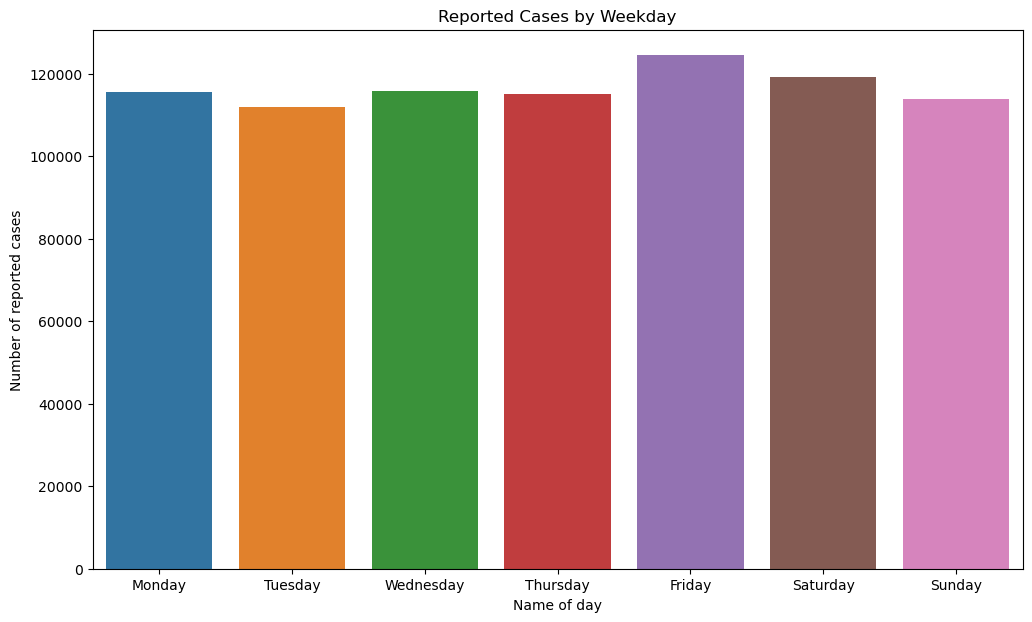

In [416]:
df['Occured Date']= pd.to_datetime(df['Occured Date'])
df['day_of_week']= df['Occured Date'].dt.day_name()

df_cases_reported_by_dayname = df.groupby('day_of_week')['ID'].count().reset_index()

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cases_reported_by_dayname['day_of_week'] = pd.Categorical(df_cases_reported_by_dayname['day_of_week'], categories=cats, ordered=True)

df_cases_reported_by_dayname = df_cases_reported_by_dayname.groupby('day_of_week')['ID'].sum().reset_index()
df_cases_reported_by_dayname.columns = ['Day Name', 'Reported Cases']
df_cases_reported_by_dayname = df_cases_reported_by_dayname.sort_values('Day Name')

plt.figure(figsize=(12,7))
sns.barplot(df_cases_reported_by_dayname, x='Day Name', y='Reported Cases')
plt.xlabel('Name of day')
plt.ylabel('Number of reported cases')
plt.title('Reported Cases by Weekday')
plt.show()